In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats

Tujuan dari Jupyter Notebook ini adalah membuat model algoritma untuk melakukan prediksi jumlah uang yang dibelanjakan para costumer untuk membeli produk tertentu. kemudian pada jupyter notebook selanjutnya. para kostumer itu akan di segmentasi pasarkan.

selain itu juga pada awal2 saya mencoba untuk memahami pola pemberian berdasarkan variable2 terntentu secara visual. seperti distribusi behavior berdasarkan jenis kelamin, martial status, kota, dan lain-lain. namun hal ini akan lebih diperdalam lagi pada jupyter notebook selanjutnya bersamaan dengan proses clustering.

Algorithma yang coba diterapkan pada pemodelan ini adalah :
1. Regularisasi Elastic Net
2. DecisionTreeClassifier
3. XGBoostDecisionTreeRegressor

pada akhirnya model yang digunakan yang paling bagus, yaitu XGBDecisionTreeRegressor

Penekanan hasil dari jupyter notebook ini adalah mencari model algoritma yang seoptimal mungkin, kemudian menentukan variable paling berpengaruh dalam pemodelan ini.

In [3]:
df = pd.read_csv('Black_Friday_Train.csv')
dftest = pd.read_csv('Black_Friday_Test.csv')

In [4]:
print(df.shape)
print(dftest.shape)

(550068, 12)
(233599, 11)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


In [5]:
print(dftest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB
None


In [6]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [7]:
dftest.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3              15
dtype: int64

In [11]:
print("Produk yang tidak ada di test data")
print(set(df.Product_ID)-set(dftest.Product_ID))

Produk yang tidak ada di test data
{'P00091242', 'P00298342', 'P00060842', 'P00206542', 'P00069642', 'P00286942', 'P00126342', 'P00075042', 'P00143242', 'P00010642', 'P00341542', 'P00068342', 'P00299342', 'P00082942', 'P00301042', 'P00301442', 'P00365942', 'P00106542', 'P00239442', 'P00027842', 'P00238842', 'P00324042', 'P00156642', 'P00375436', 'P00325042', 'P00305442', 'P00290442', 'P00069942', 'P00278842', 'P00011642', 'P00100342', 'P00224642', 'P00055942', 'P00210842', 'P00080442', 'P00038842', 'P00157242', 'P00068742', 'P00107942', 'P00295142', 'P00073342', 'P00127142', 'P00056342', 'P00216642', 'P00012942', 'P00013442', 'P00062442', 'P00341042', 'P00290842', 'P00073542', 'P00144942', 'P00062342', 'P00321242', 'P00022042', 'P00268142', 'P00299042', 'P00309742', 'P00208642', 'P00020742', 'P00074842', 'P00057842', 'P00105842', 'P00356142', 'P00365442', 'P00309642', 'P00063642', 'P00080942', 'P00311042', 'P00160742', 'P00051742', 'P00074742', 'P00318042', 'P00314842', 'P00063442', 'P

In [6]:
print("Category 1 yang tidak ada di test data")
print(set(df.Product_Category_1)-set(dftest.Product_Category_1))

Category 1 yang tidak ada di test data
{19, 20}


Banyaknya missing value pada kategori 3, kemungkinan karena barang itu hanya bisa dikategorikan ke dalam 2 tipe kategori. 3 kategori lainnya berarti kosong.

In [8]:
y = df['Purchase']

In [12]:
data = pd.concat([df, dftest]).drop(['User_ID', 'Product_ID'] ,axis=1)
category = []
numeric = []
for a in data.columns :
    if df.dtypes[a] == 'object':
        category.append(a)
        print(df[a].value_counts())
    else :
        numeric.append(a)
    

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [13]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years
0,0-17,A,F,0,10,3,NaN,NaN,8370.0,2
1,0-17,A,F,0,10,1,6.0,14.0,15200.0,2
2,0-17,A,F,0,10,12,NaN,NaN,1422.0,2
3,0-17,A,F,0,10,12,14.0,NaN,1057.0,2
4,55+,C,M,0,16,8,NaN,NaN,7969.0,4+


## Visualisasi Univariate

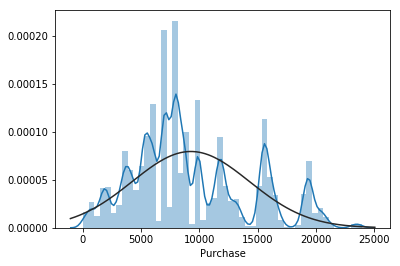

In [13]:
sns.distplot(y, fit=norm)
plt.show()

In [14]:
y.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

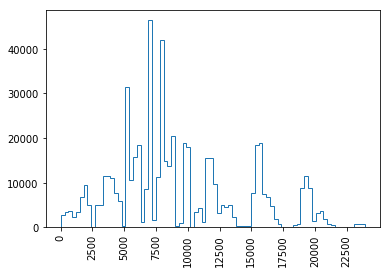

In [15]:
plt.hist(y, bins=80, histtype='step')
plt.xticks(np.arange(0,25000,2500), rotation=90)
plt.show()

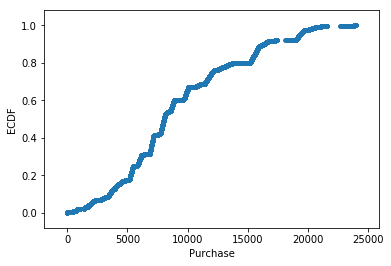

In [9]:
def ecdf (var):
    n = len(var)
    x = np.sort(var)
    y = np.arange(1, n+1) / n
    
    return x, y

x_ecdf, y_ecdf = ecdf(y)
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none')
plt.xlabel('Purchase')
plt.ylabel('ECDF')
plt.margins(0.08)
plt.show()

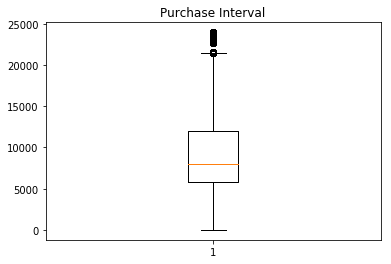

In [17]:
plt.boxplot(y)
plt.title('Purchase Interval')
plt.show()

Bentuk distribusi berpuncak puncak, ada sekitar 10 puncak, sepertinya kita bisa membagi segmentasi pasar berdayasarkan daya beli kedalam 10 group.

Jumlah pembelian yang paling banyak berada di sekitar 7000 dengan ratio >0,04% dari semuanya.

Distribusi skew phositif mengatakan bahwa jumlah pembelian lebih banyak di bawah rata-rata

dari garis ecdf memperkuat bahwa pembelian dengan jumlah 7000 kebawah memiliki kemiringan yang besar di bandingkan dengan jumlah pembelian>7000 ini menunjukan bahwa jumlah pembelian lebih banyak di bawah 7000

50 % jumlah pembelian berada dalam rentang <7000 dan sisanya antara 7000 dan 250000

In [18]:
data.nunique()

Age                               7
City_Category                     3
Gender                            2
Marital_Status                    2
Occupation                       21
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
Stay_In_Current_City_Years        5
dtype: int64

In [14]:
data.Product_Category_1 = data.Product_Category_1.astype('category')
data.Product_Category_2 = data.Product_Category_2.astype('category')
data.Product_Category_3 = data.Product_Category_3.astype('category')

In [15]:
data.Occupation = data.Occupation.astype('int')

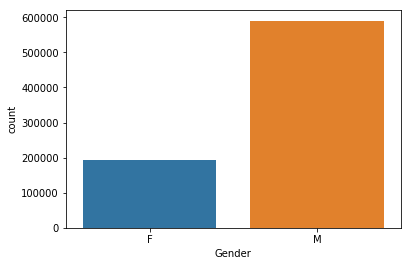

In [17]:
sns.countplot(data.Gender)
plt.show()

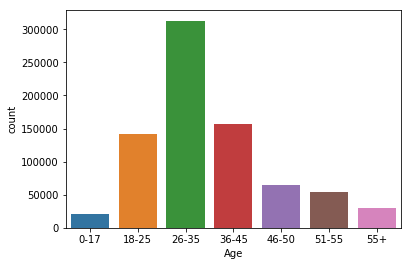

In [22]:
sns.countplot(data.Age.sort_values())
plt.show()

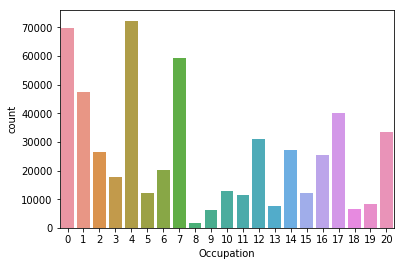

In [23]:
sns.countplot(df.Occupation)
plt.show()

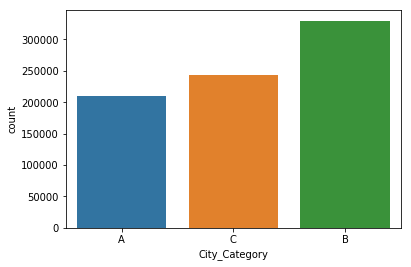

In [24]:
sns.countplot(data.City_Category)
plt.show()

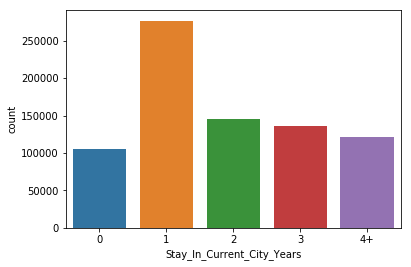

In [25]:
sns.countplot(data.Stay_In_Current_City_Years.sort_values())
plt.show()

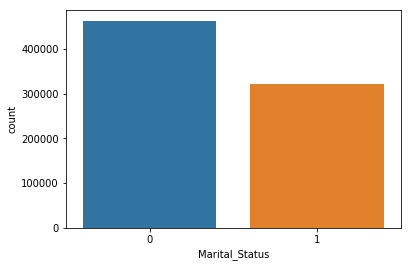

In [26]:
sns.countplot(data.Marital_Status)
plt.show()

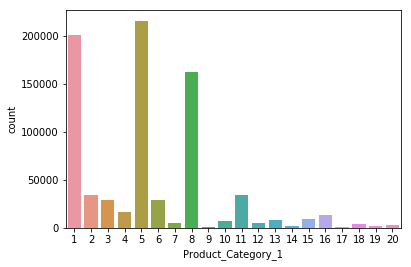

In [27]:
sns.countplot(data.Product_Category_1)
plt.show()

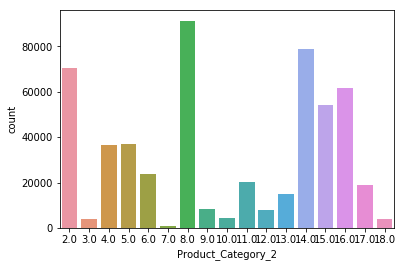

In [28]:
sns.countplot(data.Product_Category_2.sort_values())
plt.show()

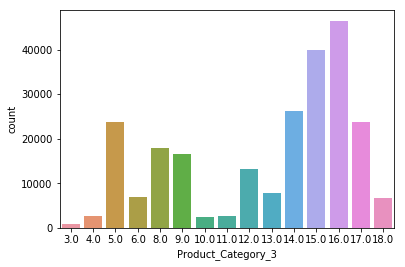

In [29]:
sns.countplot(data.Product_Category_3)
plt.show()

## Bivariate Analysis

In [16]:
from bokeh.plotting import figure
from bokeh.io import output_file, show

In [17]:
df.Purchase = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [19]:
df.Product_Category_2 = df.Product_Category_2.fillna(0)
df.Product_Category_3 = df.Product_Category_3.fillna(0)

In [20]:
data.describe(include=['O'])

,Age,City_Category,Gender,Stay_In_Current_City_Years
count,783667,783667,783667,783667
unique,7,3,2,5
top,26-35,B,M,1
freq,313015,329739,590031,276425


In [36]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [37]:
print(df.groupby('Marital_Status')['Purchase'].sum())
print(df.groupby('Marital_Status')['Purchase'].count())

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64
Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64


In [38]:
print(df.groupby('Gender')['Purchase'].sum()/df.Purchase.sum())
print(df.groupby('Gender')['Purchase'].count()/df.Purchase.count())

Gender
F    0.232786
M    0.767214
Name: Purchase, dtype: float64
Gender
F    0.246895
M    0.753105
Name: Purchase, dtype: float64


In [39]:
print(df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False)/df.Purchase.sum())
print(df.groupby('Occupation')['Purchase'].count().sort_values(ascending=False)/df.Purchase.count())

Occupation
4     0.130744
0     0.124692
7     0.109378
1     0.083326
17    0.077177
12    0.059941
20    0.058199
14    0.050915
16    0.046773
2     0.046711
6     0.036975
3     0.031791
15    0.023345
10    0.022733
5     0.022303
11    0.020949
19    0.014463
13    0.014113
18    0.011916
9     0.010664
8     0.002892
Name: Purchase, dtype: float64
Occupation
4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Purchase, dtype: float64


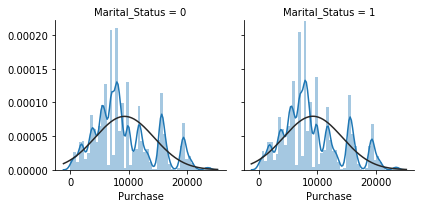

In [40]:
g = sns.FacetGrid(df, col='Marital_Status')
g.map(sns.distplot, 'Purchase', fit=norm)
plt.show()

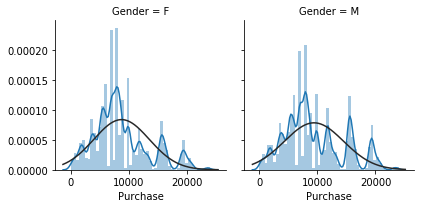

In [41]:
g = sns.FacetGrid(df, col='Gender')
g.map(sns.distplot, 'Purchase', fit=norm)
plt.show()

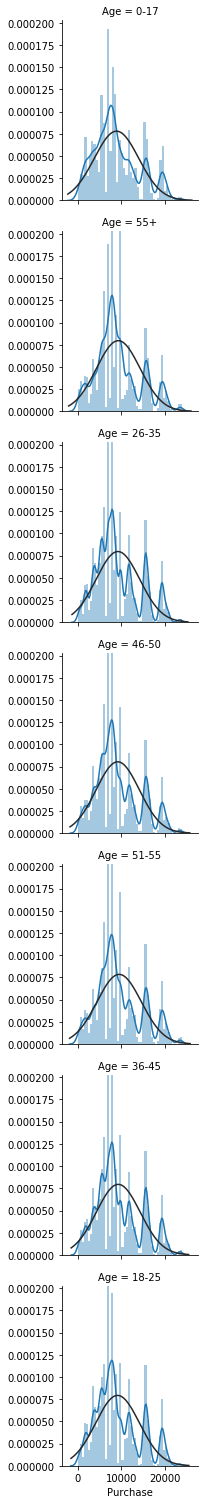

In [42]:
g = sns.FacetGrid(df, 'Age')
g.map(sns.distplot, 'Purchase', fit=norm)
plt.show()

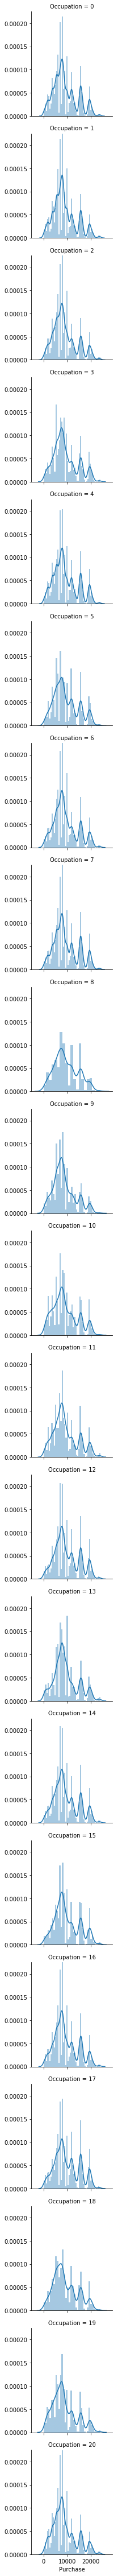

In [21]:
g = sns.FacetGrid(df, 'Occupation')
g.map(sns.distplot, 'Purchase')
plt.show()

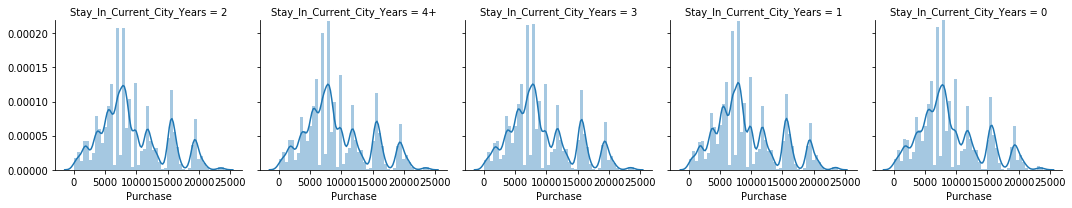

In [45]:
g = sns.FacetGrid(df, col='Stay_In_Current_City_Years')
g.map(sns.distplot, 'Purchase')
plt.show()

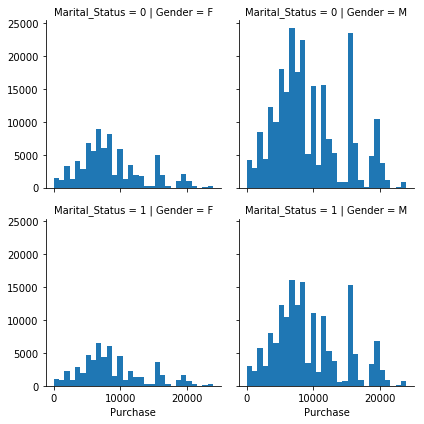

In [57]:
g = sns.FacetGrid(df, col='Gender', row='Marital_Status')
g.map(plt.hist, 'Purchase', bins=30)
plt.show()

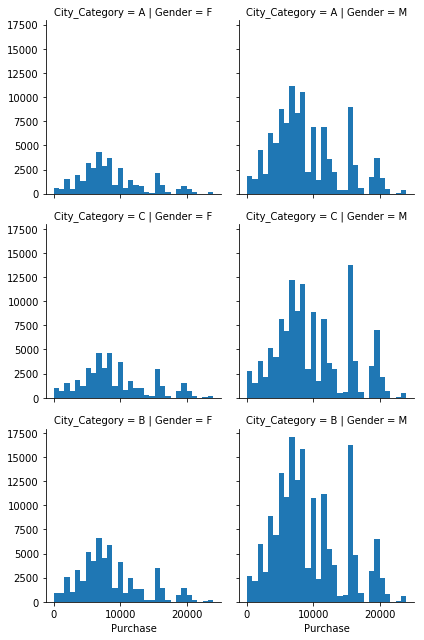

In [58]:
g=sns.FacetGrid(df, col='Gender',row='City_Category')
g.map(plt.hist, 'Purchase', bins=30)
plt.show()

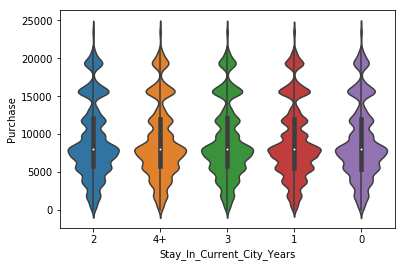

In [67]:
sns.violinplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)
plt.show()

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score ,KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

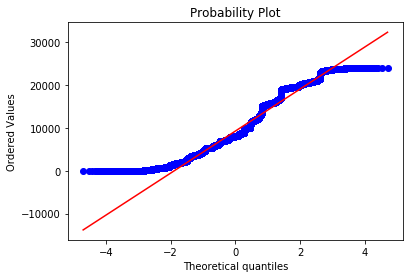

In [73]:
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [23]:
n_folds=3
def rmse_cv(model, data, target):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse=np.sqrt(-cross_val_score(model, data, target, scoring="mean_squared_error", cv = kf))
    return(rmse)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int32
Product_Category_1            783667 non-null category
Product_Category_2            537685 non-null category
Product_Category_3            237858 non-null category
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
dtypes: category(3), float64(1), int32(1), int64(1), object(4)
memory usage: 67.1+ MB


In [24]:
data.Product_Category_2=data.Product_Category_2.astype('int')
data.Product_Category_3=data.Product_Category_3.astype('int')
data.Product_Category_2 = data.Product_Category_2.fillna(0)
data.Product_Category_3=data.Product_Category_3.fillna(0)
data.Product_Category_2=data.Product_Category_2.astype('category')
data.Product_Category_3=data.Product_Category_3.astype('category')
data.Marital_Status = data.Marital_Status.astype('category')

In [101]:
x= pd.get_dummies(data.iloc[:550068, :]).drop(['Purchase'], axis=1)
x.columns

Index(['Occupation', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Gender_F', 'Gender_M',
       'Marital_Status_0', 'Marital_Status_1', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_-2147483648', 'Product_Category_2_2',
       'Product_Category_2_3', 'Product_Category_2_4', 'Product_Category_2_5',
       'Product_Category_2_6', 'Product_Category_2_7', 'Pr

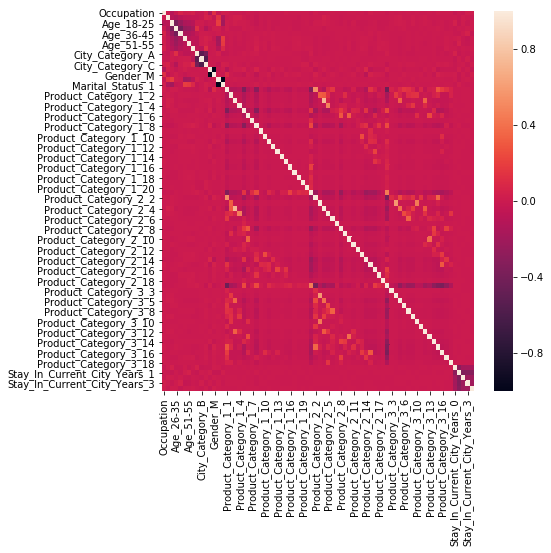

In [115]:
plt.figure(figsize=(7,7))
sns.heatmap(x.corr())
plt.show()

In [116]:
print(x.shape)
print(y.shape)

(550068, 74)
(550068,)


In [26]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
np.random.seed(21)

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3)

Elastic = ElasticNet(normalize=True) 

EN_score_cv = rmse_cv(Elastic, x_train, y_train)
EN_score_cv_test = rmse_cv(Elastic, x_test, y_test)

print(EN_score_cv.mean())
print(EN_score_cv_test.mean())

5024.9265191557
5018.540896344171


In [121]:
Elastic.fit(x_train, y_train)
print(Elastic.score(x_train,y_train))
print(Elastic.score(x_test, y_test))

8.223522274031225e-06
7.752600066468496e-06


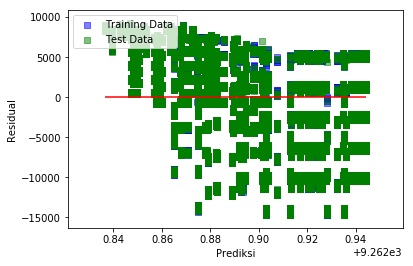

In [122]:
EN1_pred = Elastic.predict(x_train)
EN2_pred = Elastic.predict(x_test)

plt.scatter(EN1_pred, EN1_pred-y_train, c='blue', marker='s', label='Training Data', alpha=0.5)
plt.scatter(EN2_pred, EN2_pred-y_test, c='green', marker='s', label='Test Data', alpha=0.5)
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.legend(loc='upper left')
plt.hlines(y = 0,xmin=min(EN1_pred), xmax=max(EN1_pred), colors = "red")
plt.show()

In [151]:
coefEN

Occupation                        0.000000
Age_0-17                         -0.000000
Age_18-25                        -0.000000
Age_26-35                        -0.000000
Age_36-45                         0.000000
Age_46-50                        -0.000000
Age_51-55                         0.000000
Age_55+                           0.000000
City_Category_A                  -0.000000
City_Category_B                  -0.000000
City_Category_C                   0.000000
Gender_F                         -0.000000
Gender_M                          0.000000
Marital_Status_0                  0.000000
Marital_Status_1                 -0.000000
Product_Category_1_1              0.026585
Product_Category_1_2              0.002897
Product_Category_1_3              0.000000
Product_Category_1_4             -0.025635
Product_Category_1_5             -0.018056
Product_Category_1_6              0.026811
Product_Category_1_7              0.017580
Product_Category_1_8             -0.007574
Product_Cat

## Decision Tree Regressor

In [150]:
DTR = DecisionTreeRegressor()
DTRs = RandomizedSearchCV(DTR, {'min_samples_split':np.arange(20, 150, 10), 'min_samples_leaf':np.arange(1,10,2), 'max_depth':
                               np.arange(1,10,2)})
cv_DTR = rmse_cv(DTRs, x_train, y_train)

print(cv_DTR.mean())
print(rmse_cv(DTRs, x_test, y_test).mean())

3176.809435648304
3170.4258042037836


array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140])

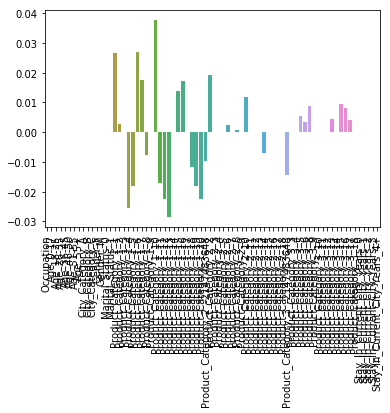

In [152]:
coefEN = pd.Series(Elastic.coef_, index=x_train.columns)
sns.barplot(coefEN.index, coefEN)
plt.xticks(rotation=90)
plt.show()

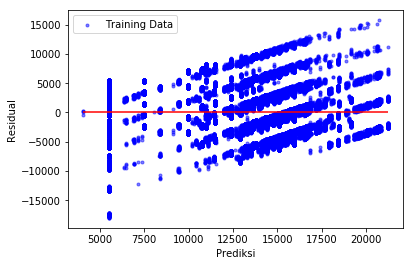

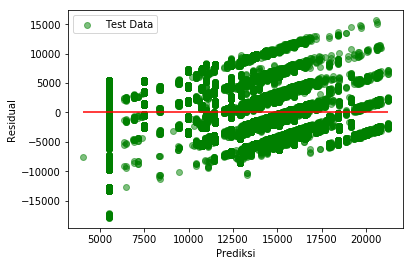

In [161]:
DTRs.fit(x_train, y_train)
DTR_pred1 = DTRs.predict(x_train)
DTR_pred2 = DTRs.predict(x_test)

plt.scatter(DTR_pred1, DTR_pred1-y_train, c='blue', marker='.', alpha=0.5, label='Training Data')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.legend(loc='upper left')
plt.hlines(y = 0,xmin=min(DTR_pred1), xmax=max(DTR_pred1), colors = "red")
plt.show()
plt.scatter(DTR_pred2, DTR_pred2-y_test, c='green', alpha=0.5, label='Test Data')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.legend(loc='upper left')
plt.hlines(y = 0,xmin=min(DTR_pred1), xmax=max(DTR_pred1), colors = "red")
plt.show()

In [157]:
DTRs.score(x_train, y_train)

0.6027439732091593

In [158]:
DTRs.score(x_test, y_test)

0.6019833885528234

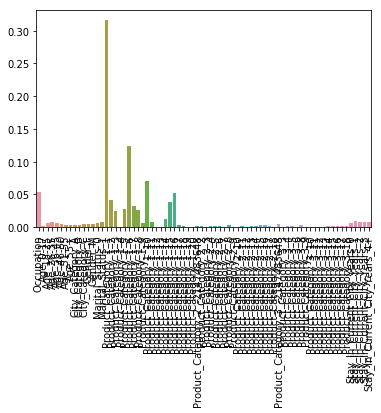

In [160]:
coef = pd.Series(DTR.feature_importances_, index=x_train.columns)
sns.barplot(coef.index, coef)
plt.xticks(rotation=90)
plt.show()

In [144]:
from sklearn.tree import export_graphviz

export_graphviz(DTR, out_file='Black_Friday.dot', feature_names=x_train.columns)

In [136]:
y.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

## XGB

In [30]:
import xgboost as xgb
Black_Friday = xgb.DMatrix(x, label=y)

In [34]:


xgb_param={'max_depth':np.arange(2,10,2), 'learning_rate':np.arange(0.1, 2, 0.1), 'n_estimators':np.arange(50,200,20), 
          'colsample_bytree':np.arange(0.1,1,0.3), 'reg_alpha': np.arange(0,1,0.1), 'reg_lambda':np.arange(0,1,0.1)}

gbm = xgb.XGBRegressor()

rans_xgb = RandomizedSearchCV(gbm, xgb_param, scoring='neg_mean_squared_error', cv=4, verbose=4)

rans_xgb.fit(x, y)

print(rans_xgb.best_params_)
print(rans_xgb.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1 
[CV]  reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1, score=-11260881.409010123, total= 1.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1 
[CV]  reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1, score=-11152638.499999458, total=  39.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[CV] reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1 
[CV]  reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1, score=-11191351.062316805, total=  22.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min remaining:    0.0s


[CV] reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1 
[CV]  reg_lambda=0.9, reg_alpha=0.2, n_estimators=90, max_depth=2, learning_rate=0.1, colsample_bytree=0.1, score=-13011317.942478856, total=  22.6s
[CV] reg_lambda=0.8, reg_alpha=0.4, n_estimators=150, max_depth=4, learning_rate=0.1, colsample_bytree=0.4 
[CV]  reg_lambda=0.8, reg_alpha=0.4, n_estimators=150, max_depth=4, learning_rate=0.1, colsample_bytree=0.4, score=-8841985.989516987, total= 1.8min
[CV] reg_lambda=0.8, reg_alpha=0.4, n_estimators=150, max_depth=4, learning_rate=0.1, colsample_bytree=0.4 
[CV]  reg_lambda=0.8, reg_alpha=0.4, n_estimators=150, max_depth=4, learning_rate=0.1, colsample_bytree=0.4, score=-8747709.500687083, total= 1.7min
[CV] reg_lambda=0.8, reg_alpha=0.4, n_estimators=150, max_depth=4, learning_rate=0.1, colsample_bytree=0.4 
[CV]  reg_lambda=0.8, reg_alpha=0.4, n_estimators=150, max_depth=4, learning_rate=0.1, colsample_bytree=0.4, score=-878386

[CV]  reg_lambda=0.6000000000000001, reg_alpha=0.2, n_estimators=70, max_depth=8, learning_rate=1.8000000000000003, colsample_bytree=0.1, score=-14009939.0021879, total=  32.8s
[CV] reg_lambda=0.0, reg_alpha=0.6000000000000001, n_estimators=130, max_depth=8, learning_rate=0.9, colsample_bytree=0.1 
[CV]  reg_lambda=0.0, reg_alpha=0.6000000000000001, n_estimators=130, max_depth=8, learning_rate=0.9, colsample_bytree=0.1, score=-8784854.949754948, total= 1.0min
[CV] reg_lambda=0.0, reg_alpha=0.6000000000000001, n_estimators=130, max_depth=8, learning_rate=0.9, colsample_bytree=0.1 
[CV]  reg_lambda=0.0, reg_alpha=0.6000000000000001, n_estimators=130, max_depth=8, learning_rate=0.9, colsample_bytree=0.1, score=-8675335.636274349, total= 1.1min
[CV] reg_lambda=0.0, reg_alpha=0.6000000000000001, n_estimators=130, max_depth=8, learning_rate=0.9, colsample_bytree=0.1 
[CV]  reg_lambda=0.0, reg_alpha=0.6000000000000001, n_estimators=130, max_depth=8, learning_rate=0.9, colsample_bytree=0.1, sc

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 65.7min finished


{'reg_lambda': 0.7000000000000001, 'reg_alpha': 0.0, 'n_estimators': 130, 'max_depth': 6, 'learning_rate': 1.0, 'colsample_bytree': 0.7000000000000001}
-8748762.867057605


In [36]:
print(rans_xgb.best_params_)
print(np.sqrt(abs(rans_xgb.best_score_)))

{'reg_lambda': 0.7000000000000001, 'reg_alpha': 0.0, 'n_estimators': 130, 'max_depth': 6, 'learning_rate': 1.0, 'colsample_bytree': 0.7000000000000001}
2957.8307705238317


In [38]:
param_tuning = {'objective':'reg:linear','reg_lambda': 0.7000000000000001, 'reg_alpha': 0.0, 'n_estimators': 130, 'max_depth': 6,
                'learning_rate': 1.0, 'colsample_bytree': 0.7000000000000001}

xgb_model = xgb.XGBRegressor(objective='reg:linear', reg_lambda=0.7, reg_alpha=0, n_estimators=130, max_depth=6, learning_rate=1,
                           colsample_bytree=0.7)

xgb_model.fit(x_train, y_train)

pred_xgb = xgb_model.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, pred_xgb)))

2895.0975487560445


In [39]:
pred_xgb_train = xgb_model.predict(x_train)

print(np.sqrt(mean_squared_error(y_train, pred_xgb_train)))

2771.141580034231


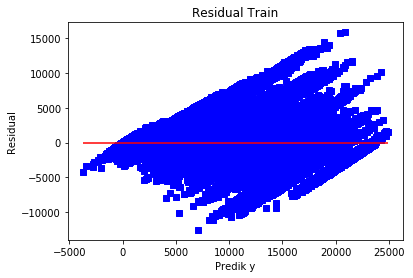

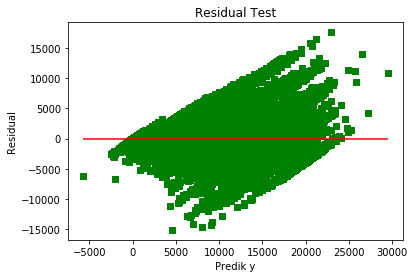

In [40]:
plt.scatter(pred_xgb_train, pred_xgb_train-y_train, c='blue', marker='s')
plt.xlabel('Predik y')
plt.ylabel('Residual')
plt.title('Residual Train')
plt.hlines(y = 0,xmin=min(pred_xgb_train), xmax=max(pred_xgb_train), colors = "red")
plt.show()

plt.scatter(pred_xgb, pred_xgb-y_test, c='green', marker='s')
plt.xlabel('Predik y')
plt.ylabel('Residual')
plt.title('Residual Test')
plt.hlines(y=0, xmin=min(pred_xgb), xmax=max(pred_xgb), colors='red')
plt.show()

In [41]:
xgb_model.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=130,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.7, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
test_data= pd.get_dummies(data.iloc[550068:, :]).drop(['Purchase'], axis=1)

In [43]:
predict_test = xgb_model.predict(test_data)

In [45]:
submission = pd.read_csv('Sample_Submission_Black_Friday.csv')

In [48]:
submission.User_ID = dftest.User_ID
submission.Product_ID = dftest.Product_ID
submission.Purchase = predict_test

In [51]:
submission.to_csv('submission_black_friday.csv')

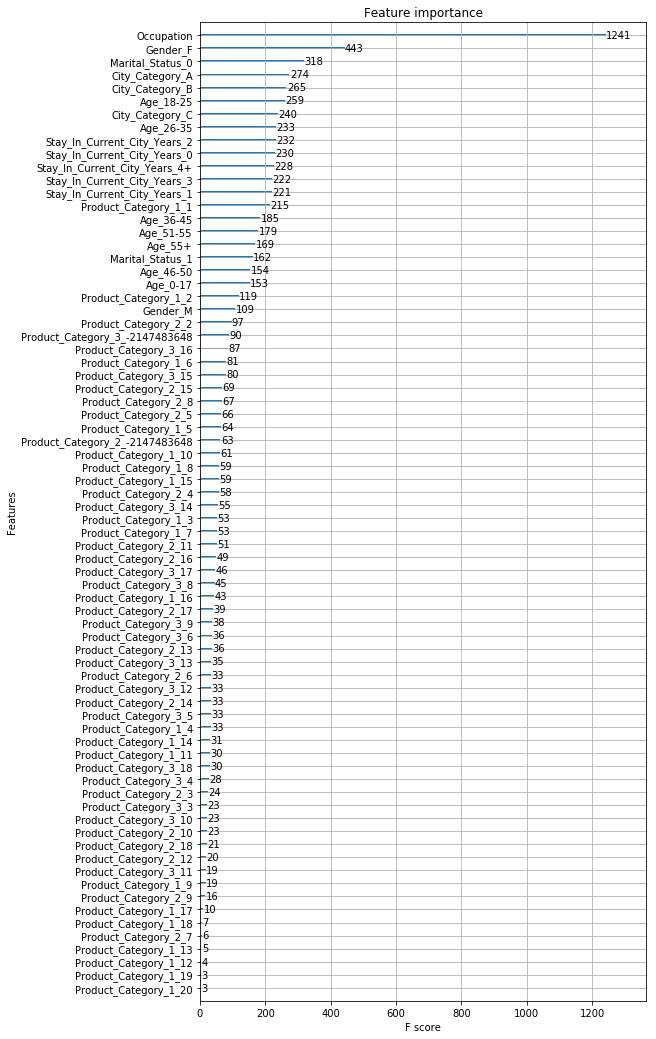

In [90]:
fig, ax = plt.subplots(1,1, figsize=(8,18))
xgb.plot_importance(xgb_model, height=0.15, ax=ax)
plt.show()

In [85]:
data.Purchase = (df.Purchase.append(pd.Series(predict_test)))

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null category
Occupation                    783667 non-null int32
Product_Category_1            783667 non-null category
Product_Category_2            783667 non-null category
Product_Category_3            783667 non-null category
Purchase                      783667 non-null float64
Stay_In_Current_City_Years    783667 non-null object
dtypes: category(4), float64(1), int32(1), object(4)
memory usage: 41.9+ MB


In [87]:
data.to_csv('Complete_Black_Friday_data.csv')

In [88]:
predict_test.sum()

2183773700.0

In [89]:
submission.nunique()

User_ID        5891
Product_ID     3491
Purchase      91399
dtype: int64

Variable yang paling berpengaruh dalam penentuan banyaknya purchase yang dilakukan oleh customer adalah occupation, Gender Female, status belum menikah, bertempat tinggal di kota A, bertempat tinggal di kota B, berumur 18-25 dan selanjutnya yang bisa dilihat pada diagram bar feature importance di atas.

variable yang paling tidak berpengaruh adalah Product Category, saya akan mencoba membuat model lagi tanpa memasukan product category.

In [116]:
new_data = data.drop(['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [117]:
new_data = new_data.iloc[:550068, :]

In [153]:
index_4 = new_data[new_data['Stay_In_Current_City_Years']== '4+' ]['Stay_In_Current_City_Years'].index

In [157]:
new_data.iloc[index_4, -1] = 4

In [160]:
new_data['Stay_In_Current_City_Years'] = new_data['Stay_In_Current_City_Years'].astype('int')

In [161]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 6 columns):
Age                           550068 non-null object
City_Category                 550068 non-null object
Gender                        550068 non-null object
Marital_Status                550068 non-null category
Occupation                    550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
dtypes: category(1), int32(2), object(3)
memory usage: 41.5+ MB


In [162]:
xgb_model.fit(pd.get_dummies(new_data), y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=130,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.7, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [164]:
pred_1 = xgb_model.predict(pd.get_dummies(new_data))
print(np.sqrt(mean_squared_error(y, pred_1)))

4901.460178159387


In [167]:
new_data = data.iloc[:550068, :]

In [168]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 9 columns):
Age                           550068 non-null object
City_Category                 550068 non-null object
Gender                        550068 non-null object
Marital_Status                550068 non-null category
Occupation                    550068 non-null int32
Product_Category_1            550068 non-null category
Product_Category_2            550068 non-null category
Product_Category_3            550068 non-null category
Stay_In_Current_City_Years    550068 non-null object
dtypes: category(4), int32(1), object(4)
memory usage: 25.2+ MB


In [169]:
new_data['Occupation'] = new_data['Occupation'].astype('category')

In [170]:
xgb_model.fit(pd.get_dummies(new_data), y)
pred_1 = xgb_model.predict(pd.get_dummies(new_data))
print(np.sqrt(mean_squared_error(y, pred_1)))

2775.4716232395085


In [171]:
new_test = data.iloc[550068:, :]
new_test['Occupation'] = new_test['Occupation'].astype('category')
pred_1_test = xgb_model.predict(pd.get_dummies(new_test))

In [172]:
submission.Purchase = pred_1_test

In [173]:
submission.to_csv('submission_black_friday_2.csv')

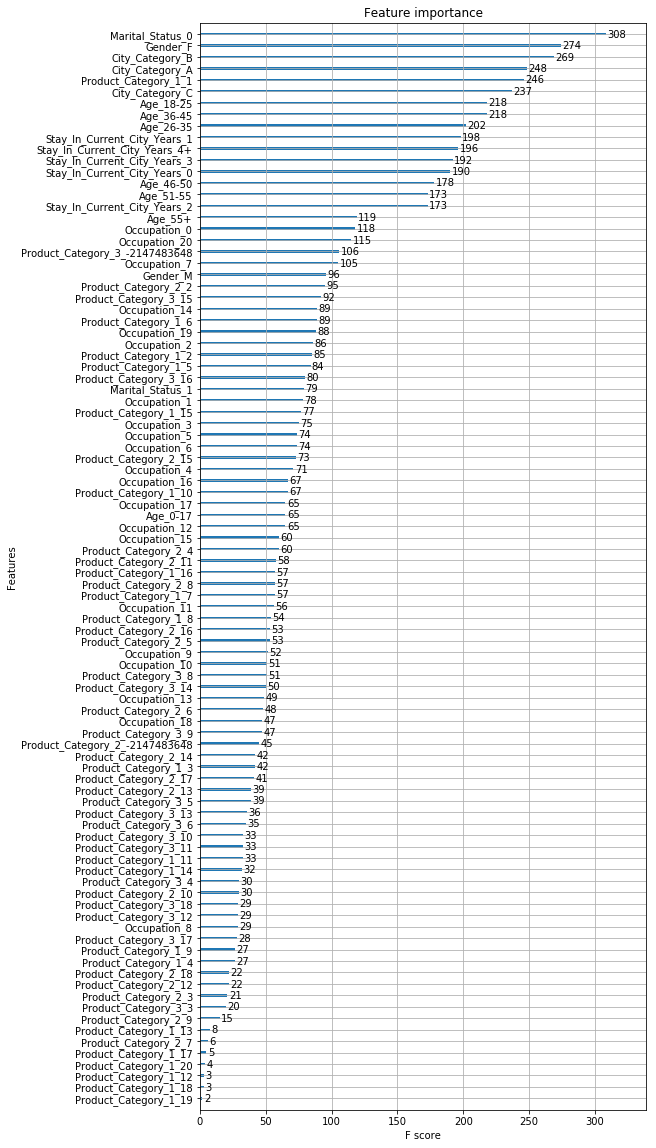

In [174]:
fig, ax = plt.subplots(1,1, figsize=(8, 20))
xgb.plot_importance(xgb_model, height=0.2, ax=ax)
plt.show()